In [112]:
import numpy as np
import seaborn as sns
import pandas as pd
import plotly.express as px  # allowing making plots
import matplotlib.pyplot as plt
import re
import nltk
from wordcloud import WordCloud


In [77]:
data = pd.read_csv("Sentiment Analysis.csv")

In [78]:
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [79]:
data.tail()

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [81]:
data.shape

(31962, 3)

In [82]:
data.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [83]:
def pattern_remove(in_text,in_pattern):
  a=re.findall(in_pattern,in_text)
  for char in a:
    in_text=re.sub(char, "", in_text)
  return in_text


In [84]:
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [85]:
data.tail()

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


New column

In [86]:
data['new_tweet'] = np.vectorize(pattern_remove)(data["tweet"],"@[\w]*")

In [87]:
data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


Removing special characters

In [88]:
data['new_tweet']=data['new_tweet'].str.replace(r"[^a-zA-Z#]", " ",regex=True)

In [89]:
data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


Now I remove words their length is less than 3

In [90]:
data["new_tweet"]=data["new_tweet"].apply(lambda b : " ".join([c for c in b.split() if len(c)>3 ]))

In [75]:
data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,NaN
1,2,0,@user @user thanks for #lyft credit i can't us...,NaN
2,3,0,bihday your majesty,NaN
3,4,0,#model i love u take with u all the time in ...,NaN
4,5,0,factsguide: society now #motivation,NaN


In [91]:
used_words= data['new_tweet'].apply(lambda b : b.split())
used_words.head()

,new_tweet
0,"[when, father, dysfunctional, selfish, drags, ..."
1,"[thanks, #lyft, credit, cause, they, offer, wh..."
2,"[bihday, your, majesty]"
3,"[#model, love, take, with, time]"
4,"[factsguide, society, #motivation]"


Combining words into sentences

In [92]:
for i in range(len(used_words)):
  used_words[i]=" ".join(used_words[i])

data['new_tweet']=used_words

In [93]:
data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [94]:
freq_words=" ".join([words for words in data['new_tweet']])

In [95]:
cloud_word=WordCloud(width=850,height=550,random_state=50,
                     max_font_size=90).generate(freq_words)

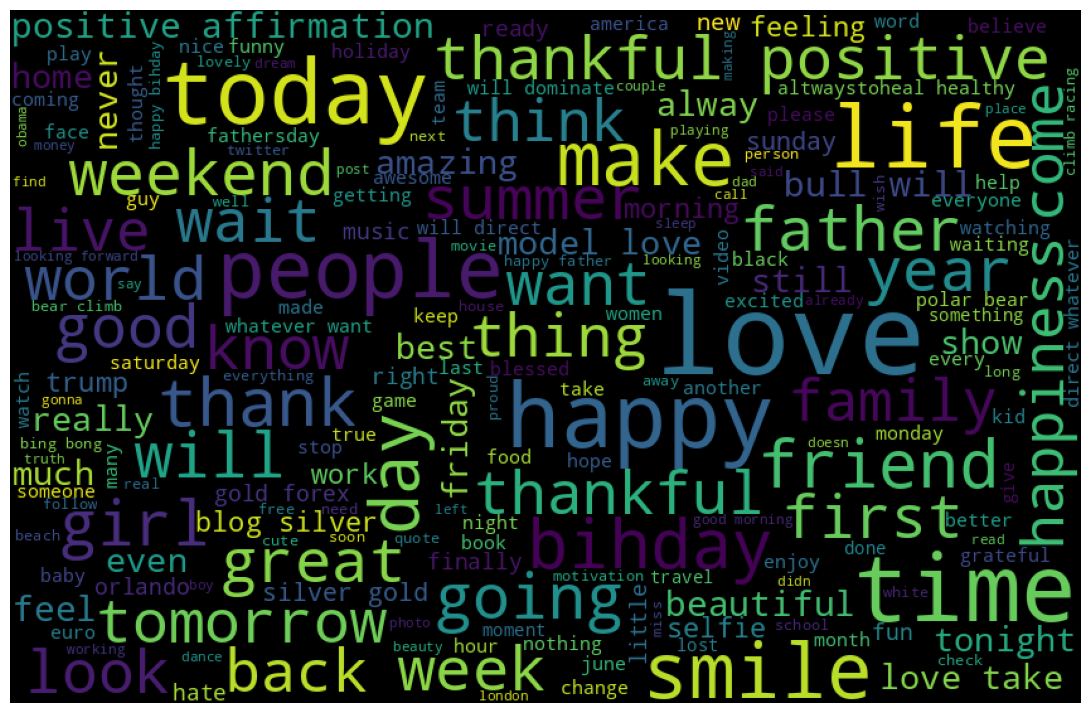

In [96]:
plt.figure(figsize=(16,9))
plt.imshow(cloud_word)
plt.axis("off")
plt.show()

I will classify those words as positive or negative

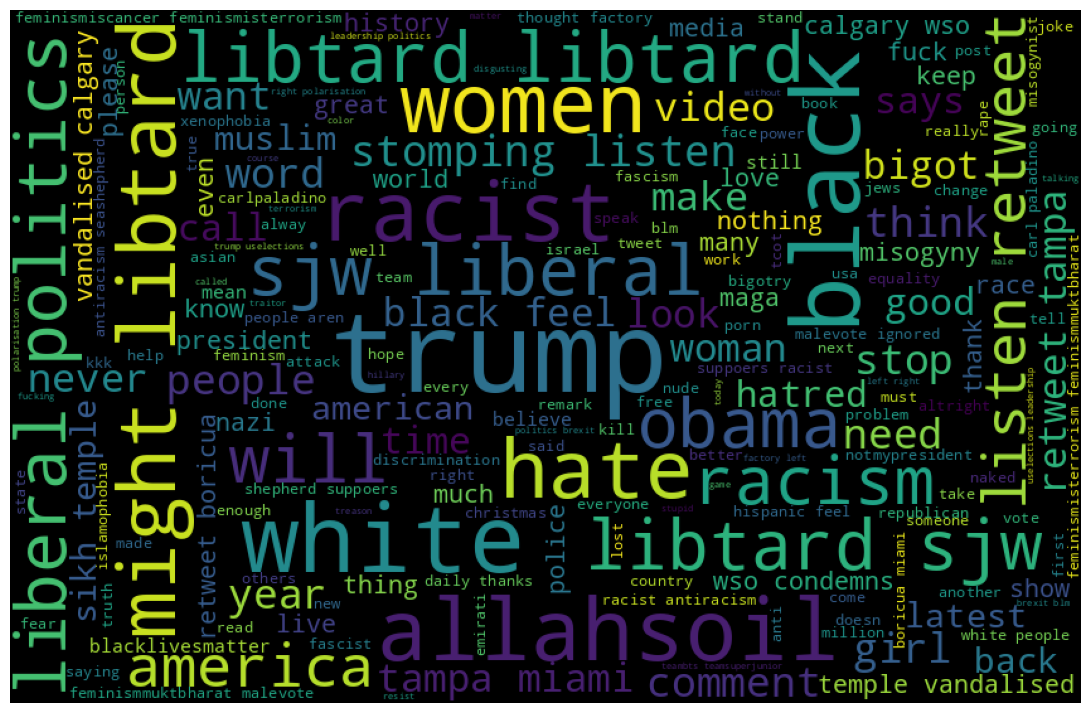

In [101]:
freq_words=" ".join([words for words in data['new_tweet'][data['label']==1]])

cloud_word=WordCloud(width=850,height=550,random_state=50,
                     max_font_size=90).generate(freq_words)

plt.figure(figsize=(16,9))
plt.imshow(cloud_word)
plt.axis("off")
plt.show()

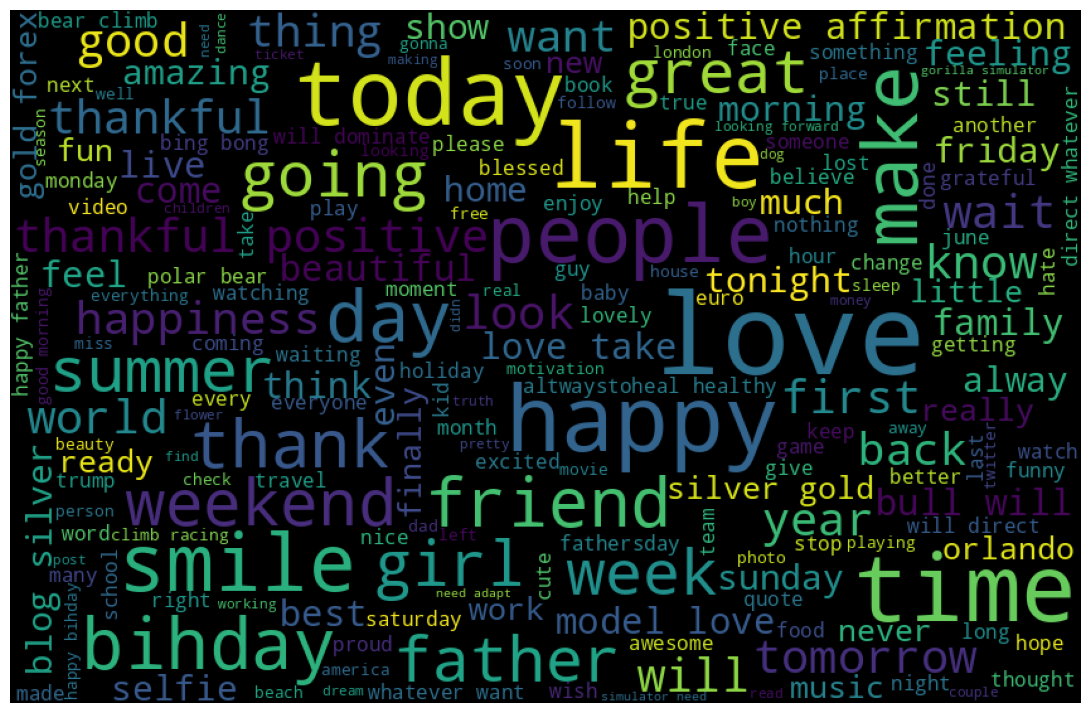

In [102]:
freq_words=" ".join([words for words in data['new_tweet'][data['label']==0]])

cloud_word=WordCloud(width=850,height=550,random_state=50,
                     max_font_size=90).generate(freq_words)

plt.figure(figsize=(16,9))
plt.imshow(cloud_word)
plt.axis("off")
plt.show()

Removing Hashtags

In [103]:
def get_hashtag(tweets):
  hash_tag = []
  for tweet in tweets:
    d=re.findall(r"#(\w+)",tweet)
    hash_tag.append(d)
  return hash_tag

  # for tweet in tweets:
  #   for word in tweet.split():
  #     if word.startswith('#'):
  #       hash_tag.append(word)
  # return hash_tag

In [106]:
hashtag_negative = get_hashtag(data['new_tweet'][data['label']==1])
hashtag_positive = get_hashtag(data['new_tweet'][data['label']==0])

In [109]:
hashtag_negative[:5]

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphins',
  'thecove',
  'helpcovedolphins'],
 [],
 [],
 ['neverump', 'xenophobia']]

In [110]:
hashtag_positive[:5]

[['run'], ['lyft', 'disapointed', 'getthanked'], [], ['model'], ['motivation']]

In [111]:
hashtag_positive=sum(hashtag_positive,[])
hashtag_negative=sum(hashtag_negative,[])


In [113]:
hashtag_positive[:5]

['run', 'lyft', 'disapointed', 'getthanked', 'model']

In [116]:
tweet_count=nltk.FreqDist(hashtag_positive)
e = pd.DataFrame({'Hashtag': list(tweet_count.keys()),
                  'Count': list(tweet_count.values())})

In [117]:
e.head()

,Hashtag,Count
0,run,34
1,lyft,2
2,disapointed,1
3,getthanked,2
4,model,365


In [123]:
e=e.nlargest(columns='Count',n=5)
fig = px.bar(x="Hashtag",y="Count",color="Hashtag",data_frame=e)
fig.show()

In [124]:
hashtag_negative[:5]

['cnn', 'michigan', 'tcot', 'australia', 'opkillingbay']

In [125]:
tweet_count=nltk.FreqDist(hashtag_negative)
e = pd.DataFrame({'Hashtag': list(tweet_count.keys()),
                  'Count': list(tweet_count.values())})

In [126]:
e.head()

,Hashtag,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


In [127]:
e=e.nlargest(columns="Count",n=5)
fig=px.bar(x="Hashtag",y="Count",color="Hashtag",data_frame=e)
fig.show()